In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/remote-work-productivity/remote_work_productivity.csv


# Remote Work Productivity Analysis

In this notebook, we analyze the impact of remote work vs. in-office work on productivity and well-being. We will:

1. Explore the dataset.
2. Perform descriptive statistics.
3. Visualize key findings.
4. Compare productivity and well-being metrics.


# Library and Data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/remote-work-productivity/remote_work_productivity.csv')


In [3]:
df.head()

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74


In [4]:
df.describe()

,Employee_ID,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.720000,68.602000,63.975000
std,288.819436,8.042779,12.235494,13.870572
min,1.000000,16.000000,33.000000,14.000000
25%,250.750000,34.750000,60.000000,56.000000
50%,500.500000,40.000000,68.000000,65.000000
75%,750.250000,45.000000,76.000000,73.000000
max,1000.000000,64.000000,112.000000,104.000000


In [5]:
df.isnull().sum()

Employee_ID              0
Employment_Type          0
Hours_Worked_Per_Week    0
Productivity_Score       0
Well_Being_Score         0
dtype: int64

# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


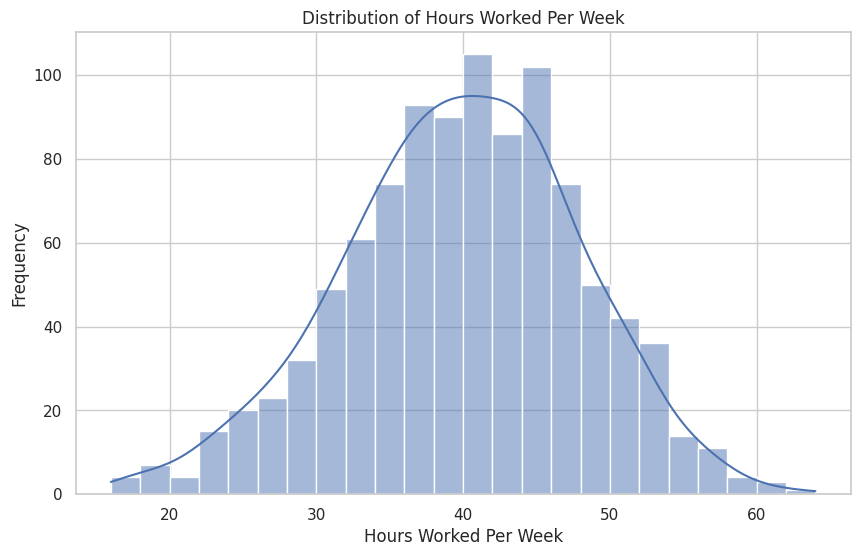

In [6]:
sns.set(style="whitegrid")

# Distribution of Hours Worked Per Week
plt.figure(figsize=(10, 6))
sns.histplot(df['Hours_Worked_Per_Week'], kde=True)
plt.title('Distribution of Hours Worked Per Week')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Frequency')
plt.show()

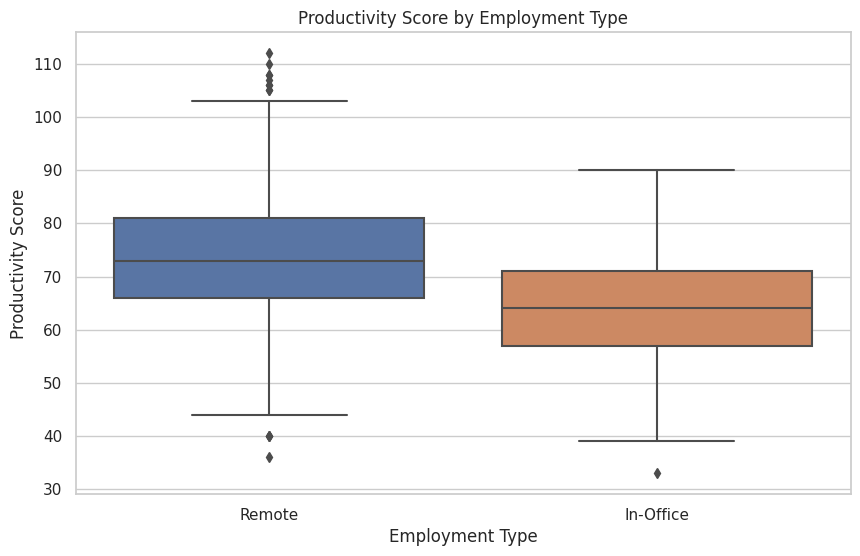

In [7]:
# Productivity Score by Employment Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_Type', y='Productivity_Score', data=df)
plt.title('Productivity Score by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Productivity Score')
plt.show()

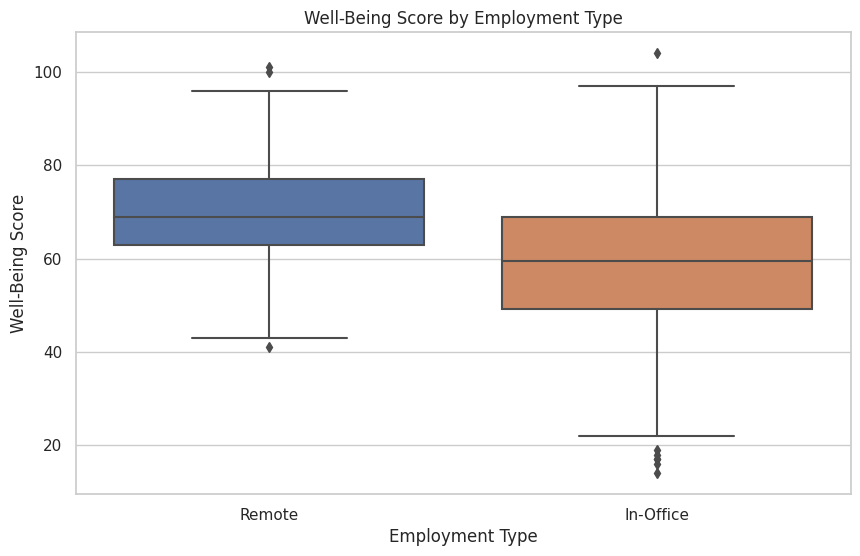

In [8]:
# Well-Being Score by Employment Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_Type', y='Well_Being_Score', data=df)
plt.title('Well-Being Score by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Well-Being Score')
plt.show()

In [9]:
from scipy.stats import ttest_ind

# Separate data by employment type
remote = df[df['Employment_Type'] == 'Remote']
in_office = df[df['Employment_Type'] == 'In-Office']

# T-test for productivity scores
t_stat, p_val = ttest_ind(remote['Productivity_Score'], in_office['Productivity_Score'])
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# T-test for well-being scores
t_stat, p_val = ttest_ind(remote['Well_Being_Score'], in_office['Well_Being_Score'])
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 13.90611174283721, P-value: 2.5817862051504303e-40
T-statistic: 13.388113736276154, P-value: 1.0299152621146473e-37


## Conclusion

Our analysis reveals key insights into how remote and in-office work environments impact productivity and well-being:

- **Productivity:** Remote workers tend to have higher productivity scores on average compared to in-office workers.
- **Well-Being:** Remote workers also report higher well-being scores, indicating a potential benefit of remote work on overall satisfaction.

These findings suggest that remote work might offer advantages in both productivity and well-being, although further investigation is needed to confirm these trends.
